# Classification Model of Purchase Intentions
### DSCI100 Project Proposal Group 13

## Introduction
This data set outlines the Purchasing Intentions of various Online Shoppers. The data set is made up of 8 columns with five thousand rows of observations and findings. All of this information can be used and analyzed depending on what information is needed. In this project, we are hoping to build a classification model to predict the purchase intentions of the users and determine whether the user will make a purchase or not. The data set that we will use to answer this question is the “Online Shoppers Purchasing Intention Dataset Data Set”. This is a data set that outlines multiple different factors including how quickly the viewer leaves the site without further inquiries, called ‘Bounce Rate, if the site is accessed close to a holiday, called ‘Special Day’, the region it is accessed in, the visitor type, and whether it is the weekend or not when they are visiting the site. We will predominantly use the "Bounce Rate", "Exit Rate", "Page Value", “Special Day” categories to answer our question. 


## Preliminary exploratory data analysis

In [27]:
library(tidyverse)
library(tidymodels)

### Read and wrangle the data set


In [28]:
set.seed(3456)
shoppers <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv") %>%
    select(BounceRates:Month, Weekend:Revenue) %>%
    mutate(Revenue = as_factor(Revenue))

shoppers_split <- initial_split(shoppers, prop = 0.5, strata = Revenue)
shoppers_train <- training(shoppers_split)
shoppers_test <- testing(shoppers_split)

head(shoppers_train)

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<fct>
0.20,0.20000000,0,0,Feb,FALSE,FALSE
0.20,0.20000000,0,0,Feb,FALSE,FALSE
0.05,0.14000000,0,0,Feb,FALSE,FALSE
0.02,0.05000000,0,0,Feb,TRUE,FALSE
0.20,0.20000000,0,0,Feb,TRUE,FALSE
0.00,0.06666667,0,0,Feb,FALSE,FALSE


### Summarize the training set

In [29]:
nrow(shoppers_train)
summary(shoppers_train)

[1] 6165

  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :  0.000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.01427   1st Qu.:  0.000   1st Qu.:0.00000  
 Median :0.00303   Median :0.02501   Median :  0.000   Median :0.00000  
 Mean   :0.02146   Mean   :0.04246   Mean   :  5.887   Mean   :0.06125  
 3rd Qu.:0.01667   3rd Qu.:0.04865   3rd Qu.:  0.000   3rd Qu.:0.00000  
 Max.   :0.20000   Max.   :0.20000   Max.   :360.953   Max.   :1.00000  
    Month            Weekend         Revenue    
 Length:6165        Mode :logical   FALSE:5211  
 Class :character   FALSE:4692      TRUE : 954  
 Mode  :character   TRUE :1473                  
                                                
                                                
                                                

There are 6165 observations in the training set. 

|    |BounceRates|ExitRates    |PageValues   |SpecialDay|
|:-: |---        |---          |---          |-------------|
|Mean|  0.02146  | 0.04246     |     5.887   |    0.06125  |

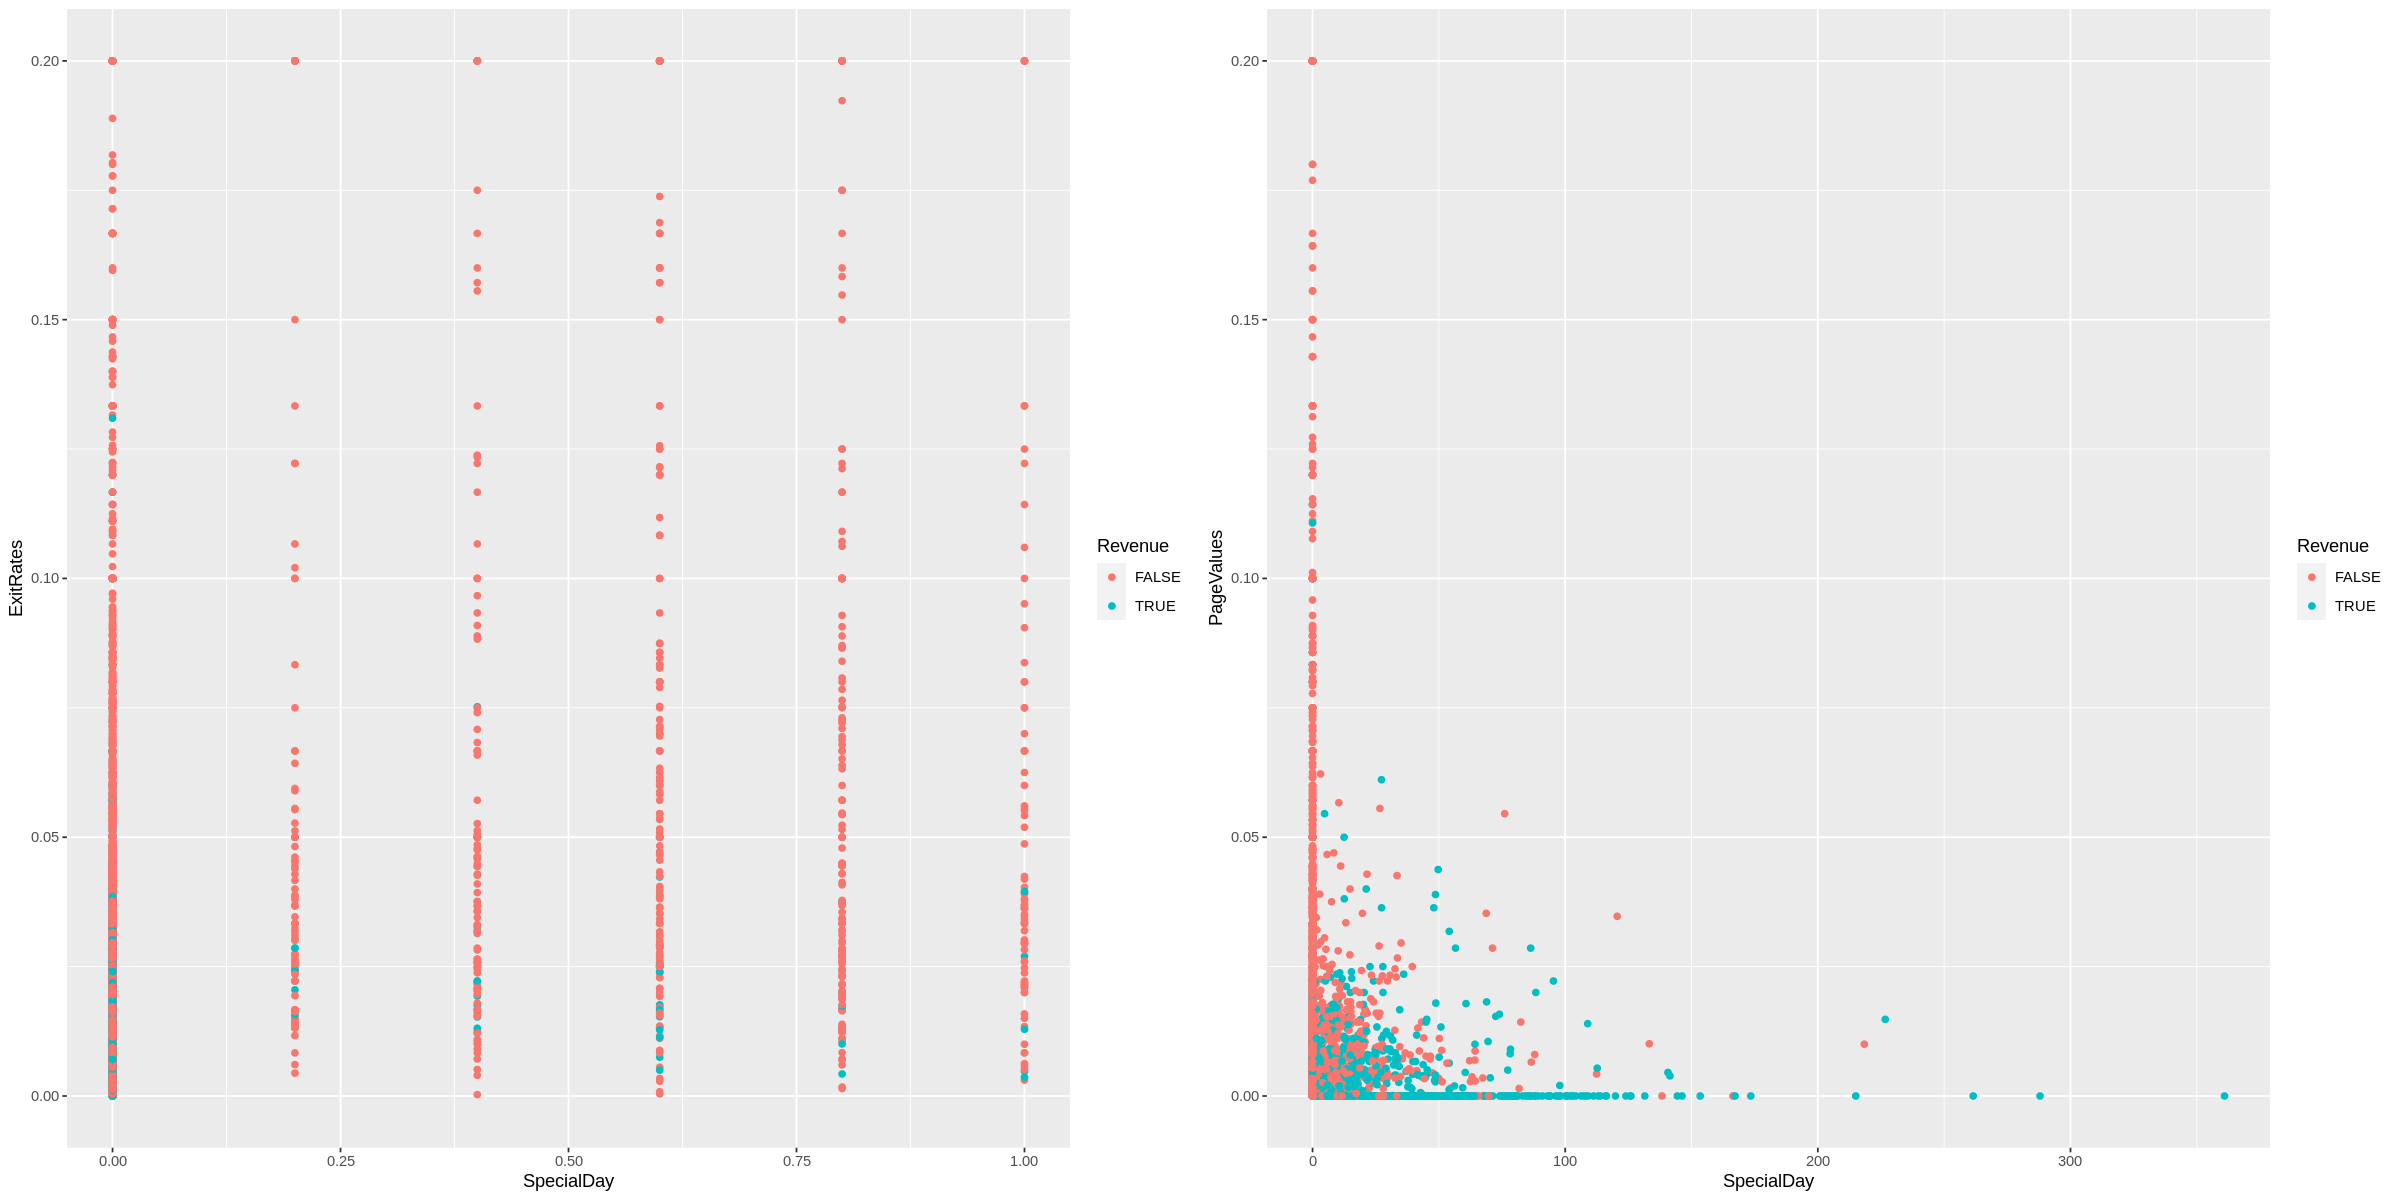

In [38]:
# your code here
options(repr.plot.width = 20, repr.plot.height = 10)
rate_plot <- shoppers_train %>%
    ggplot(aes(x=SpecialDay, y=ExitRates)) +
    geom_point(aes(colour = Revenue)) +
    labs(x="SpecialDay", y = "ExitRates", colour = "Revenue")

value_plot <- shoppers_train %>%
    ggplot(aes(x=PageValues, y=BounceRates)) +
    geom_point(aes(colour = Revenue)) +
    labs(x="SpecialDay", y = "PageValues", colour = "Revenue")

library(cowplot)
plot_grid(rate_plot, value_plot, nrow = 1)

## Methods
Our data will first be split into a training set and a testing set. Since we have a large data frame of 5000 rows, we will be splitting the data 50/50 to each set. If our data frame was smaller, then this ratio could result in a biased model that is heavily reliant on what rows happened to be selected for training, however half of our database is still 2500 rows which will be sufficient for providing a large enough sample. We will then create a classification model using tidymodels. The model will predict for the “Revenue” outcome, which indicates whether or not a user made a purchase through the factors TRUE/FALSE.  The variables we will be using include: "Bounce Rate", "Exit Rate", "Page Value", “Special Day”, “Month”, and “Weekend”. 

## Expected outcomes and significance
We expect to find that on special days there will be more website traffic than on regular days. With this, we are also expecting that the bounce rate may be higher on special days as people may look around at multiple websites before choosing one to shop from. If this finding is true, then it could impact the marketing and pricing that companies use during the time frame of these special days. As well, it may affect the way that a company prepares for higher usage of their website to ensure they do not face any website crashes that could decrease the volume of people able to browse and buy during these times. If there was to be further investigation on this topic, marketing, pricing, or stability of the website (??) could be looked into to see if there is any effect between purchase intentions of the shoppers and marketing, pricing, and stability of the websites during these times, and if changing these other variables may lead to more or less business during these busier times.  
